## ⚙️ Import Libraries

In [4]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)



import tensorflow as tf

from tensorflow.keras import mixed_precision

# Enable mixed precision training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.17.0
Keras version: 3.4.1
GPU devices: 1


I0000 00:00:1734023560.217503     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023560.218547     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023560.218567     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## ⏳ Load the Data

In [5]:
data = np.load("/in/mars_for_students.npz")

training_set = data["training_set"]

X_test = data["test_set"]

data =  np.load("/in/cleaned.npz")
training_set = data['training_set']  # Shape: (N, 2, 64, 128)
X_train = training_set[:, 0]
y_train = training_set[:, 1]

## 🛠️ Train and Save the Model

In [6]:
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0
y_train = y_train[..., np.newaxis]
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


In [7]:
!TF_GPU_THREAD_MODE=gpu_private
!TF_GPU_ALLOCATOR=cuda_malloc_async
!TF_CUDNN_USE_AUTOTUNE=1

b

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1,shuffle=True
)

In [9]:
!pip install albumentations


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
from keras import Loss
from keras.src.optimizers import AdamW

mean_iou = tfk.metrics.MeanIoU(num_classes=num_classes, ignore_class=0, sparse_y_pred=False)

from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

I0000 00:00:1734023570.186918     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023570.187046     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023570.187089     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023570.597921     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734023570.598226     327 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-12

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint , Callback ,ReduceLROnPlateau
import IPython.display as display

In [15]:

class CustomReduceLROnPlateau(Callback):
    def __init__(self, monitor='val_loss', patience=10, factor=0.1, min_lr=1e-6, verbose=1):
        super(CustomReduceLROnPlateau, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.verbose = verbose
        self.best_weights = None
        self.best_score = float('inf')
        self.wait = 0
        self.lr_history = []

    def on_epoch_end(self, epoch, logs=None):
        current_score = logs.get(self.monitor)
        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))

        if current_score is None:
            return

        # If we found a better score, update the best weights and reset patience
        if current_score < self.best_score:
            self.best_score = current_score
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1

        # Reduce the learning rate if the patience is exceeded
        if self.wait >= self.patience:
            new_lr = max(current_lr * self.factor, self.min_lr)
            self.model.optimizer.learning_rate.assign(new_lr)

            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: reducing learning rate to {new_lr:.6f}")

            # Restore the best weights
            self.model.set_weights(self.best_weights)
            self.wait = 0
            self.lr_history.append(new_lr)

    def on_train_end(self, logs=None):
        # Restore the best weights at the end of training if needed
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)

In [16]:
from sklearn.metrics import jaccard_score

In [17]:
!pip install opencv-contrib-python
!export TF_GPU_ALLOCATOR=cuda_malloc_asyn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [18]:
!export TF_GPU_ALLOCATOR=cuda_malloc_async
!pip install ipython


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [19]:
from IPython.display import clear_output


class DisplayLearningRateCallback(Callback):
    def __init__(self):
        super(DisplayLearningRateCallback, self).__init__()
    def on_epoch_end(self, epoch, logs=None):
        # Get the current learning rate from the optimizer and display it
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        print(f"Epoch {epoch+1} : Learning rate = {tf.keras.backend.get_value(lr)}")
        #print the loss and mean IOU and val_loss and val_mean_iou
        print(f"Loss: {logs.get('loss')}, Mean IOU: {logs.get('mean_io_u')} , Val Loss: {logs.get('val_loss')}, Val Mean IOU: {logs.get('val_mean_io_u')}  ")


import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np


base_lr = 1e-6
max_lr = 1e-4
step_size = 2000  # Number of iterations per cycle

lr_display_callback = DisplayLearningRateCallback()
print("Training the model...")
print(y_train.shape)

y_train = tf.cast(y_train, tf.int32)
y_val= tf.cast(y_val, tf.int32)  # Cast to int32, if not already of that type

Training the model...
(28915, 64, 128, 1)


In [20]:
class DisplayLearningRateCallback_acc(Callback):
    def __init__(self):
        super(DisplayLearningRateCallback_acc, self).__init__()
    def on_epoch_end(self, epoch, logs=None):
        clear_output()
        # Get the current learning rate from the optimizer and display it
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        print(f"Epoch {epoch+1} : Learning rate = {tf.keras.backend.get_value(lr)}")
        #print the loss and mean IOU and val_loss and val_mean_iou
        print(f"Loss: {logs.get('loss')}, Accuracy: {logs.get('accuracy')}  , Val Loss: {logs.get('val_loss')}, Val Accuracy: {logs.get('val_accuracy')}  ")


In [22]:
!pip install PyWavelets


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [23]:
from keras.src.regularizers import regularizers
from tensorflow.keras.layers import LeakyReLU
from keras.layers import (
    Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Activation, GlobalAveragePooling2D, Reshape, Dense, Multiply
)
class InstanceNormalization(tfk.layers.Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):
        self.gamma = self.add_weight(
            shape=(input_shape[-1],),
            initializer="ones",
            trainable=True,
            name="gamma"
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],),
            initializer="zeros",
            trainable=True,
            name="beta"
        )
        super(InstanceNormalization, self).build(input_shape)

    def call(self, inputs):
        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)
        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)
        return self.gamma * normalized + self.beta


from keras.src.optimizers import Adam
from keras.src.layers import concatenate, GroupNormalization

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, Input, BatchNormalization
from tensorflow.keras.regularizers import l2

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, Input, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Reshape, Dense, LayerNormalization, Dropout, MultiHeadAttention
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Dense, LayerNormalization, Dropout, MultiHeadAttention

import pywt

class EmbossLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(EmbossLayer, self).__init__()
        self.kernel = tf.constant(
            [[-2, -1, 0],
             [-1,  1, 1],
             [ 0,  1, 2]],
            dtype=tf.float32,
            shape=[3, 3, 1, 1]
        )

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.float32)  # Convert to float32
        embossed = tf.nn.conv2d(inputs, self.kernel, strides=[1, 1, 1, 1], padding="SAME")
        return tf.cast(embossed, tf.float16)  # Return in original dtype

class HaarWaveletTransformLayer(tf.keras.layers.Layer):
    def __init__(self, level=1):
        super(HaarWaveletTransformLayer, self).__init__()
        self.level = level

    def call(self, inputs):
        # Convert inputs to float32 for computations
        inputs = tf.cast(inputs, tf.float32)

        def haar_wavelet_transform(batch_image):
            # Haar wavelet decomposition filter
            filter_matrix = tf.constant(
                [[1, 1], [1, -1]], dtype=tf.float32
            ) / tf.sqrt(2.0)

            # Reshape filter for 2D convolution
            filter_matrix = tf.reshape(filter_matrix, [2, 2, 1, 1])

            output = batch_image
            for _ in range(self.level):
                # Approximation and detail coefficients
                approx = tf.nn.conv2d(output, filter_matrix, strides=[1, 2, 2, 1], padding="VALID")
                detail_h = tf.nn.conv2d(output, tf.reverse(filter_matrix, axis=[0]), strides=[1, 2, 2, 1], padding="VALID")
                detail_v = tf.nn.conv2d(output, tf.reverse(filter_matrix, axis=[1]), strides=[1, 2, 2, 1], padding="VALID")
                detail_d = tf.nn.conv2d(output, tf.reverse(filter_matrix, axis=[0, 1]), strides=[1, 2, 2, 1], padding="VALID")

                # Concatenate along the channel axis
                output = tf.concat([approx, detail_h, detail_v, detail_d], axis=-1)

            return output

        # Apply Haar transform to the entire batch
        batch_output = tf.map_fn(
            lambda x: haar_wavelet_transform(tf.expand_dims(x, axis=0)),  # Add batch dimension
            inputs,
            fn_output_signature=tf.float32,
        )

        # Remove extra batch dimension and convert back to float16
        return tf.cast(tf.squeeze(batch_output, axis=1), tf.float16)

    def compute_output_shape(self, input_shape):
        batch, height, width, channels = input_shape
        height //= 2 ** self.level
        width //= 2 ** self.level
        return (batch, height, width, channels * 4)


def squeeze_excite_block(input_tensor, ratio=16):
    """Squeeze-and-Excitation block."""
    channel_axis = -1  # Assuming channels-last format
    filters = input_tensor.shape[channel_axis]

    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape((1, 1, filters))(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dropout(0.05)(se)
    return Multiply()([input_tensor, se])
class GaussianDenoiseLayer(Layer):
    def __init__(self, kernel_size=3):
        super(GaussianDenoiseLayer, self).__init__()
        self.kernel_size = kernel_size
        self.sigma = self.add_weight(
            shape=(),
            initializer="ones",
            trainable=True,
            name="sigma"
        )

    def call(self, inputs):
        # Create Gaussian kernel dynamically based on sigma
        x = tf.range(-(self.kernel_size // 2), self.kernel_size // 2 + 1, dtype=tf.float32)
        gauss = tf.exp(-0.5 * (x / self.sigma)**2)
        gauss = gauss / tf.reduce_sum(gauss)
        gauss_kernel = tf.einsum('i,j->ij', gauss, gauss)  # Create 2D Gaussian kernel

        # Reshape kernel to match input channels
        channels = tf.shape(inputs)[-1]  # Dynamically determine number of channels
        gauss_kernel = gauss_kernel[..., tf.newaxis, tf.newaxis]  # Shape: (k, k, 1, 1)
        gauss_kernel = tf.tile(gauss_kernel, [1, 1, channels, 1])  # Match channels

        # Apply Gaussian filter
        outputs = tf.nn.depthwise_conv2d(
            inputs, gauss_kernel, strides=[1, 1, 1, 1], padding="SAME"
        )
        return outputs

class TrainableDilationLayer(layers.Layer):
    def __init__(self, filter_size=3, **kwargs):
        super(TrainableDilationLayer, self).__init__(**kwargs)
        self.filter_size = filter_size
        self.dilation_filter = self.add_weight(
            name="dilation_filter",
            shape=(self.filter_size, self.filter_size, 1, 1),
            initializer="glorot_uniform",
            trainable=True,
        )

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.float32)
        # Apply dilation using the trainable filter
        return  tf.cast(tf.nn.dilation2d(
            inputs,
            filter=self.dilation_filter,
            strides=[1, 1, 1, 1],
            rates=[1, 1, 1, 1],
            padding="SAME",
        ),tf.float16)


class TrainableErosionLayer(layers.Layer):
    def __init__(self, filter_size=3, **kwargs):
        super(TrainableErosionLayer, self).__init__(**kwargs)
        self.filter_size = filter_size
        self.erosion_filter = self.add_weight(
            name="erosion_filter",
            shape=(self.filter_size, self.filter_size, 1, 1),
            initializer="glorot_uniform",
            trainable=True,
        )

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.float32)
        # Apply erosion using the trainable filter
        return tf.cast(tf.nn.erosion2d(
            inputs,
            filter=self.erosion_filter,
            strides=[1, 1, 1, 1],
            rates=[1, 1, 1, 1],
            padding="SAME",
        ),tf.float16)



def unet(pretrained_weights=None, input_size=(64, 128, 1)):
    inputs = Input(input_size)
    denoised = GaussianDenoiseLayer()(inputs)
    # Encoder - contracting path with InstanceNormalization\
    wavelet_layer = HaarWaveletTransformLayer( level=1)(inputs)
    merged_inputs = concatenate([inputs, denoised,UpSampling2D(size=(2, 2))(wavelet_layer)], axis=3)  # Shape: (None, 64, 128, 2)

    # Encoder - contracting path
    conv1 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(merged_inputs)
    conv1 = InstanceNormalization()(conv1)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv1)
    conv1 = InstanceNormalization()(conv1)
    conv1 = LeakyReLU()(conv1)
    conv1 = squeeze_excite_block(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(pool1)
    conv2 = InstanceNormalization()(conv2)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv2)
    conv2 = InstanceNormalization()(conv2)
    conv2 = LeakyReLU()(conv2)
    conv2 = squeeze_excite_block(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(512, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(pool2)
    conv3 = InstanceNormalization()(conv3)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(512, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv3)
    conv3 = InstanceNormalization()(conv3)
    conv3 = LeakyReLU()(conv3)
    conv3 = squeeze_excite_block(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(1024, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(pool3)
    conv4 = InstanceNormalization()(conv4)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(1024, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv4)
    conv4 = InstanceNormalization()(conv4)
    conv4 = LeakyReLU()(conv4)
    conv4 = squeeze_excite_block(conv4)
    drop4 = Dropout(0.2)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(2048, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(pool4)
    conv5 = InstanceNormalization()(conv5)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(2048, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv5)
    conv5 = InstanceNormalization()(conv5)
    conv5 = LeakyReLU()(conv5)
    conv5 = squeeze_excite_block(conv5)
    drop5 = Dropout(0.2)(conv5)

    # Decoder - expanding path with InstanceNormalization
    up6 = Conv2D(512, 2, activation='linear', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6,pool3,MaxPooling2D(pool_size=(2, 2))(pool2),MaxPooling2D(pool_size=(4, 4))(pool1)], axis=3)
    conv6 = Conv2D(512, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(merge6)
    conv6 = InstanceNormalization()(conv6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(512, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv6)
    conv6 = InstanceNormalization()(conv6)
    conv6 = LeakyReLU()(conv6)
    conv6 = squeeze_excite_block(conv6)

    up7 = Conv2D(256, 2, activation='linear', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7,pool2,MaxPooling2D(pool_size=(2, 2))(pool1)], axis=3)
    conv7 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(merge7)
    conv7 = InstanceNormalization()(conv7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv7)
    conv7 = InstanceNormalization()(conv7)
    conv7 = LeakyReLU()(conv7)
    conv7 = squeeze_excite_block(conv7)

    up8 = Conv2D(128, 2, activation='linear', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8,pool1], axis=3)
    conv8 = Conv2D(128, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(merge8)
    conv8 = InstanceNormalization()(conv8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(128, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv8)
    conv8 = InstanceNormalization()(conv8)
    conv8 = LeakyReLU()(conv8)
    conv8 = squeeze_excite_block(conv8)

    up9 = Conv2D(256, 2, activation='linear', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(merge9)
    conv9 = InstanceNormalization()(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(256, 3, activation='linear', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv9)
    conv9 = InstanceNormalization()(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = squeeze_excite_block(conv9)

    output = Conv2D(5, (1, 1), activation="softmax", name="original_output")(conv9)
    # Post-processed output

    model = Model(inputs=inputs, outputs=output)

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

input_shape = (64, 128, 1)
num_classes = 5  # Including the background class

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications

# Mini Atrous Spatial Pyramid Pooling (Mini-ASPP)
def MiniASPP(input_tensor, filters=64):
    conv1x1 = layers.Conv2D(filters, (1, 1), activation="relu", padding="same")(input_tensor)
    conv3x3_r1 = layers.Conv2D(filters, (3, 3), activation="relu", dilation_rate=1, padding="same")(input_tensor)
    conv3x3_r2 = layers.Conv2D(filters, (3, 3), activation="relu", dilation_rate=2, padding="same")(input_tensor)
    concat = layers.Concatenate()([conv1x1, conv3x3_r1, conv3x3_r2])
    output = layers.Conv2D(filters, (1, 1), activation="relu", padding="same")(concat)
    return output

# Polarized Self-Attention (PSA)
def PolarizedSelfAttention(input_tensor):
    # Channel attention
    channel_avg = layers.GlobalAveragePooling2D(keepdims=True)(input_tensor)
    channel_max = layers.GlobalMaxPooling2D(keepdims=True)(input_tensor)
    channel_attention = layers.Conv2D(input_tensor.shape[-1], (1, 1), activation="sigmoid", padding="same", kernel_regularizer=l2(0.01))(
        layers.Concatenate()([channel_avg, channel_max])
    )

    # Spatial attention
    spatial_avg = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    spatial_attention = layers.Conv2D(1, (7, 7), activation="sigmoid", padding="same", kernel_regularizer=l2(0.01))(spatial_avg)

    # Combined attention
    return input_tensor * channel_attention * spatial_attention

# Strip Pyramid Pooling Module (SPPM)
def StripPyramidPoolingModule(input_tensor, filters=64):
    h, w = input_tensor.shape[1], input_tensor.shape[2]
    pool1x1 = layers.AveragePooling2D(pool_size=(h, 1))(input_tensor)
    pool1x1 = layers.Conv2D(filters, (1, 1), activation="relu", padding="same", kernel_regularizer=l2(0.01))(pool1x1)
    pool1xW = layers.AveragePooling2D(pool_size=(1, w))(input_tensor)
    pool1xW = layers.Conv2D(filters, (1, 1), activation="relu", padding="same", kernel_regularizer=l2(0.01))(pool1xW)

    pool1x1_upsampled = layers.UpSampling2D(size=(h, 1), interpolation="bilinear")(pool1x1)
    pool1xW_upsampled = layers.UpSampling2D(size=(1, w), interpolation="bilinear")(pool1xW)

    concat = layers.Concatenate()([input_tensor, pool1x1_upsampled, pool1xW_upsampled])
    output = layers.Conv2D(filters, (1, 1), activation="relu", padding="same")(concat)
    return output

# MarsSeg Model
def MarsSeg(input_shape=(64, 128, 1), num_classes=5):
    inputs = layers.Input(shape=input_shape)

    # Encoder (ResNet50 Backbone)
    base_model = applications.ResNet50(include_top=False, input_tensor=inputs, weights=None)
    shallow_features = base_model.get_layer("conv1_relu").output  # Shallow features
    mid_features = base_model.get_layer("conv2_block3_out").output  # Mid-level features
    deep_features = base_model.get_layer("conv3_block4_out").output  # Deep features

    # Feature Enhancement
    enhanced_shallow = MiniASPP(shallow_features)
    enhanced_shallow = Dropout(0.3)(enhanced_shallow)
    enhanced_shallow = PolarizedSelfAttention(enhanced_shallow)
    enhanced_shallow = Dropout(0.3)(enhanced_shallow)
    enhanced_mid = StripPyramidPoolingModule(mid_features)
    enhanced_mid = Dropout(0.3)(enhanced_mid)


    # Decoder
    x = layers.UpSampling2D((2, 2))(deep_features)
    x = layers.Concatenate()([x, enhanced_mid])
    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.00001))(x)
    x = InstanceNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Concatenate()([x, enhanced_shallow])
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.00001))(x)
    x = InstanceNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.000001))(x)
    x = InstanceNormalization()(x)
    # Final Output
    outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Compile and summarize the model
marsseg_model = MarsSeg()
marsseg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
marsseg_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 128,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 134,   │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 64,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 2,422,135 (9.24 MB)

 Trainable params: 2,412,023 (9.20 MB)

 Non-trainable params: 10,112 (39.50 KB)

In [25]:

model =marsseg_model



# Display model summary
# model.summary()

# multi_class_model = build_fcn(input_shape=(64, 128, 6), num_classes=5)  # Softmax activation for multi-class output
# multi_class_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss= hybrid_multiclass_loss, metrics=[mean_iou])


I0000 00:00:1734023594.805431     464 service.cc:146] XLA service 0x7fa81c03b560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734023594.805666     464 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-12 17:13:15.152617: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
W0000 00:00:1734023595.523277     464 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2024-12-12 17:13:17.709889: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906
2024-12-12 17:13:26.500772: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f16[128,64,128,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[128,64,128,64]{3,2,


Epoch 1: val_loss improved from inf to 3.42114, saving model to best_model_weights.h5.keras
Epoch 1 : Learning rate = 9.999999747378752e-05
Loss: 3.527998924255371, Mean IOU: 0.1692788004875183 , Val Loss: 3.421142101287842, Val Mean IOU: 0.10524526983499527  

Epoch 2: val_loss improved from 3.42114 to 2.90389, saving model to best_model_weights.h5.keras
Epoch 2 : Learning rate = 9.999999747378752e-05
Loss: 2.229569673538208, Mean IOU: 0.2691148519515991 , Val Loss: 2.903888702392578, Val Mean IOU: 0.12290672212839127  

Epoch 3: val_loss improved from 2.90389 to 2.46834, saving model to best_model_weights.h5.keras
Epoch 3 : Learning rate = 9.999999747378752e-05
Loss: 1.511318564414978, Mean IOU: 0.3127984404563904 , Val Loss: 2.4683353900909424, Val Mean IOU: 0.12211719900369644  

Epoch 4: val_loss improved from 2.46834 to 1.81569, saving model to best_model_weights.h5.keras
Epoch 4 : Learning rate = 9.999999747378752e-05
Loss: 1.068584680557251, Mean IOU: 0.33705809712409973 , Val

2024-12-12 17:16:22.971318: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


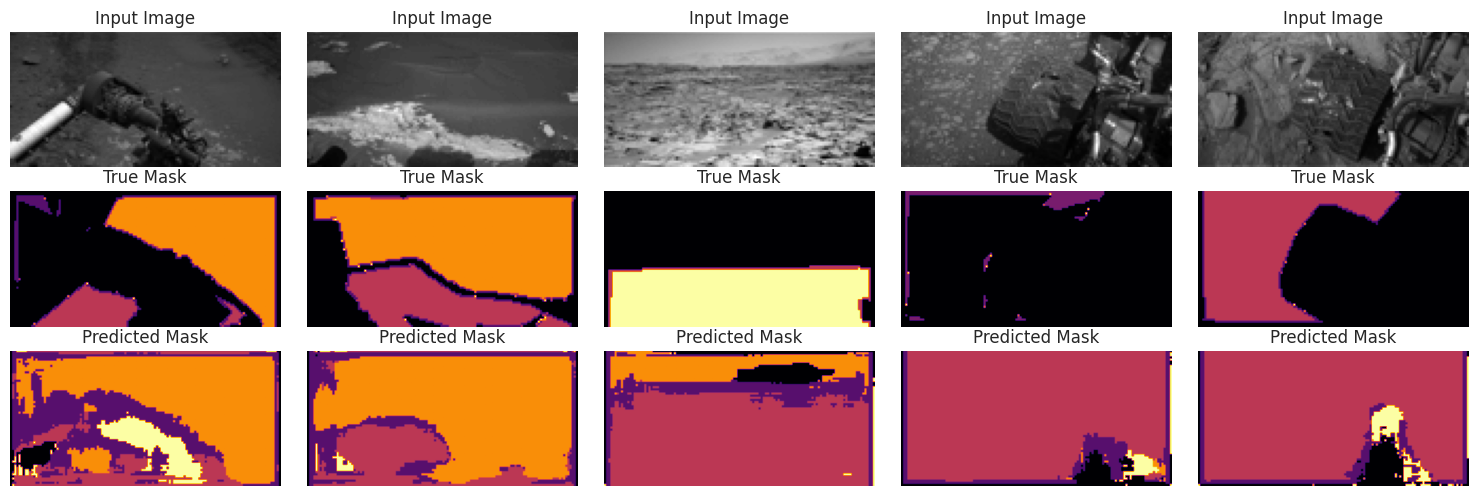


Epoch 6: val_loss improved from 0.80982 to 0.67276, saving model to best_model_weights.h5.keras
Epoch 6 : Learning rate = 9.999999747378752e-05
Loss: 0.6175128221511841, Mean IOU: 0.3720770478248596 , Val Loss: 0.6727649569511414, Val Mean IOU: 0.4036472737789154  

Epoch 7: val_loss did not improve from 0.67276
Epoch 7 : Learning rate = 9.999999747378752e-05
Loss: 0.5086431503295898, Mean IOU: 0.38651522994041443 , Val Loss: 0.6904700398445129, Val Mean IOU: 0.3648924231529236  

Epoch 8: val_loss improved from 0.67276 to 0.57855, saving model to best_model_weights.h5.keras
Epoch 8 : Learning rate = 9.999999747378752e-05
Loss: 0.43688949942588806, Mean IOU: 0.4018840193748474 , Val Loss: 0.5785505771636963, Val Mean IOU: 0.4194793105125427  

Epoch 9: val_loss did not improve from 0.57855
Epoch 9 : Learning rate = 9.999999747378752e-05
Loss: 0.38950201869010925, Mean IOU: 0.4156970977783203 , Val Loss: 0.6029847264289856, Val Mean IOU: 0.4069492816925049  

Epoch 10: val_loss did not

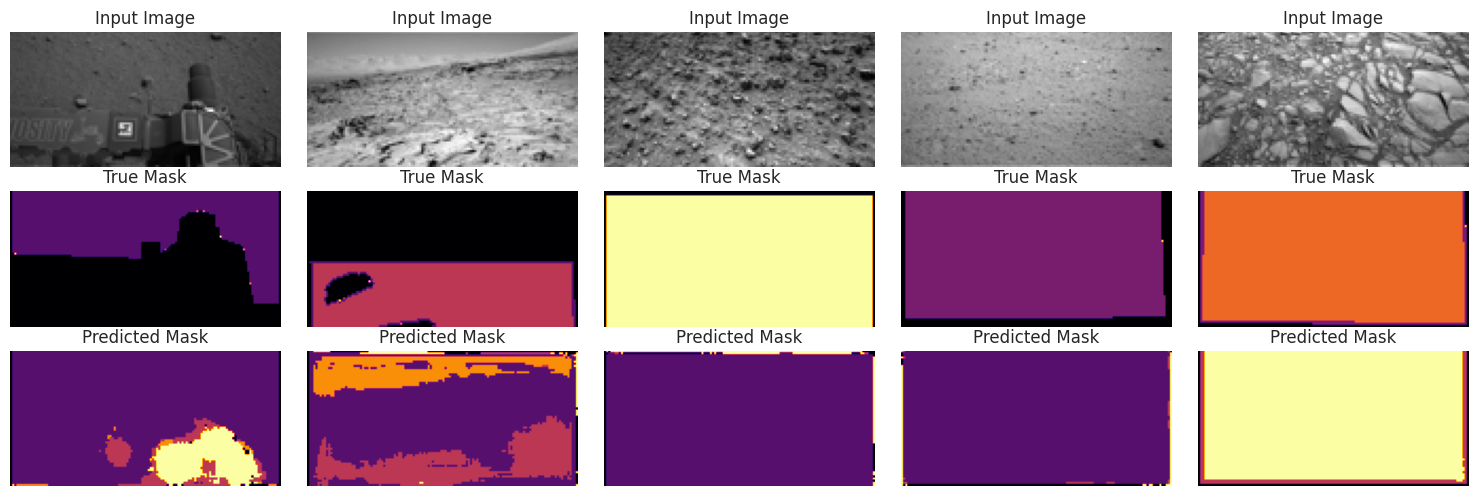


Epoch 11: val_loss did not improve from 0.57855
Epoch 11 : Learning rate = 9.999999747378752e-05
Loss: 0.32909634709358215, Mean IOU: 0.44604092836380005 , Val Loss: 0.7242468595504761, Val Mean IOU: 0.37890300154685974  

Epoch 12: val_loss did not improve from 0.57855
Epoch 12 : Learning rate = 9.999999747378752e-05
Loss: 0.31429746747016907, Mean IOU: 0.4546993672847748 , Val Loss: 0.9998282790184021, Val Mean IOU: 0.3062501847743988  

Epoch 13: val_loss improved from 0.57855 to 0.47695, saving model to best_model_weights.h5.keras
Epoch 13 : Learning rate = 9.999999747378752e-05
Loss: 0.30316096544265747, Mean IOU: 0.46189212799072266 , Val Loss: 0.47694894671440125, Val Mean IOU: 0.444875568151474  

Epoch 14: val_loss did not improve from 0.47695
Epoch 14 : Learning rate = 9.999999747378752e-05
Loss: 0.30587366223335266, Mean IOU: 0.4592815041542053 , Val Loss: 0.6483739018440247, Val Mean IOU: 0.39310282468795776  

Epoch 15: val_loss did not improve from 0.47695
Epoch 15 : Lea

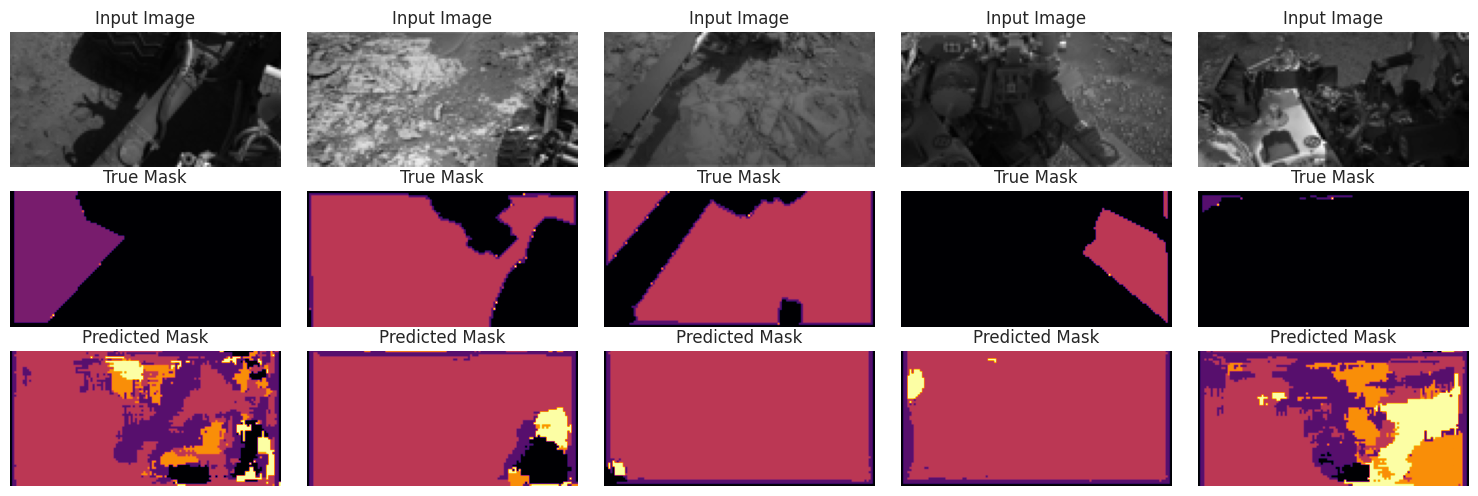


Epoch 16: val_loss did not improve from 0.47695
Epoch 16 : Learning rate = 9.999999747378752e-05
Loss: 0.2787973880767822, Mean IOU: 0.4826892018318176 , Val Loss: 0.4989333152770996, Val Mean IOU: 0.4257224202156067  

Epoch 17: val_loss improved from 0.47695 to 0.43113, saving model to best_model_weights.h5.keras
Epoch 17 : Learning rate = 9.999999747378752e-05
Loss: 0.26387205719947815, Mean IOU: 0.4966519773006439 , Val Loss: 0.4311314523220062, Val Mean IOU: 0.46175616979599  

Epoch 18: val_loss did not improve from 0.43113
Epoch 18 : Learning rate = 9.999999747378752e-05
Loss: 0.2560240924358368, Mean IOU: 0.5045120120048523 , Val Loss: 0.4516667425632477, Val Mean IOU: 0.45143359899520874  

Epoch 19: val_loss did not improve from 0.43113
Epoch 19 : Learning rate = 9.999999747378752e-05
Loss: 0.2484954446554184, Mean IOU: 0.5146864652633667 , Val Loss: 0.5489984750747681, Val Mean IOU: 0.42759132385253906  

Epoch 20: val_loss did not improve from 0.43113
Epoch 20 : Learning r

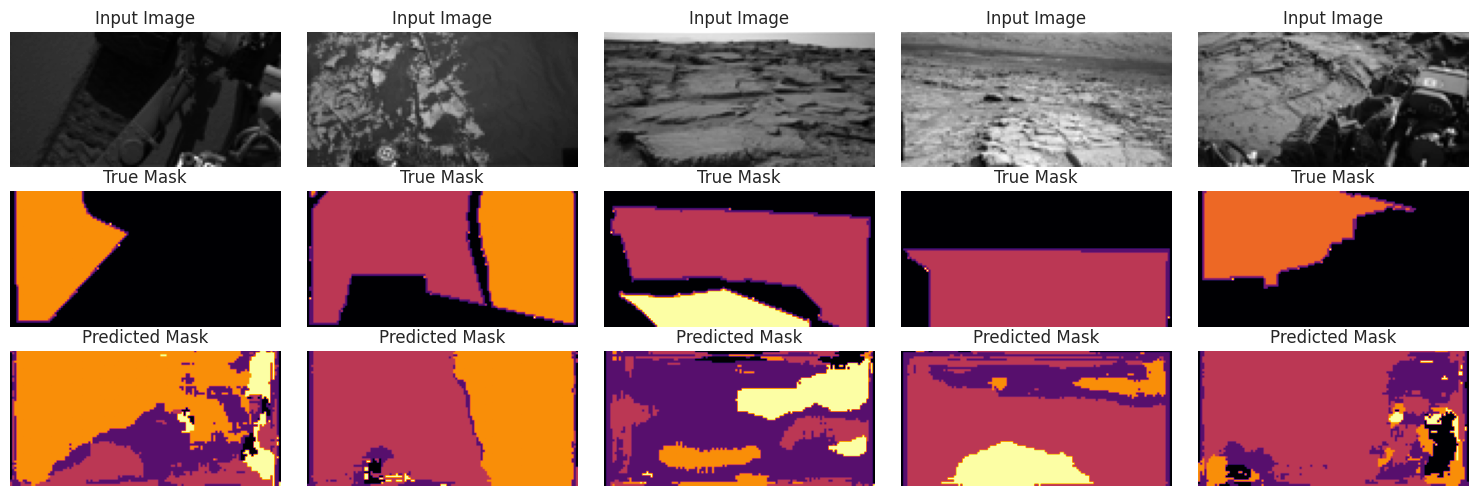


Epoch 21: val_loss did not improve from 0.43113
Epoch 21 : Learning rate = 9.999999747378752e-05
Loss: 0.2368595451116562, Mean IOU: 0.5290178656578064 , Val Loss: 0.5069962739944458, Val Mean IOU: 0.4523696005344391  

Epoch 22: val_loss did not improve from 0.43113
Epoch 22 : Learning rate = 9.999999747378752e-05
Loss: 0.2339080423116684, Mean IOU: 0.532823920249939 , Val Loss: 0.5369185209274292, Val Mean IOU: 0.4367160201072693  

Epoch 23: val_loss did not improve from 0.43113
Epoch 23 : Learning rate = 9.999999747378752e-05
Loss: 0.22721081972122192, Mean IOU: 0.540627658367157 , Val Loss: 0.5596521496772766, Val Mean IOU: 0.42857542634010315  

Epoch 24: val_loss did not improve from 0.43113
Epoch 24 : Learning rate = 9.999999747378752e-05
Loss: 0.22133570909500122, Mean IOU: 0.5501776933670044 , Val Loss: 0.47645559906959534, Val Mean IOU: 0.46976765990257263  

Epoch 25: val_loss did not improve from 0.43113
Epoch 25 : Learning rate = 9.999999747378752e-05
Loss: 0.21310609579

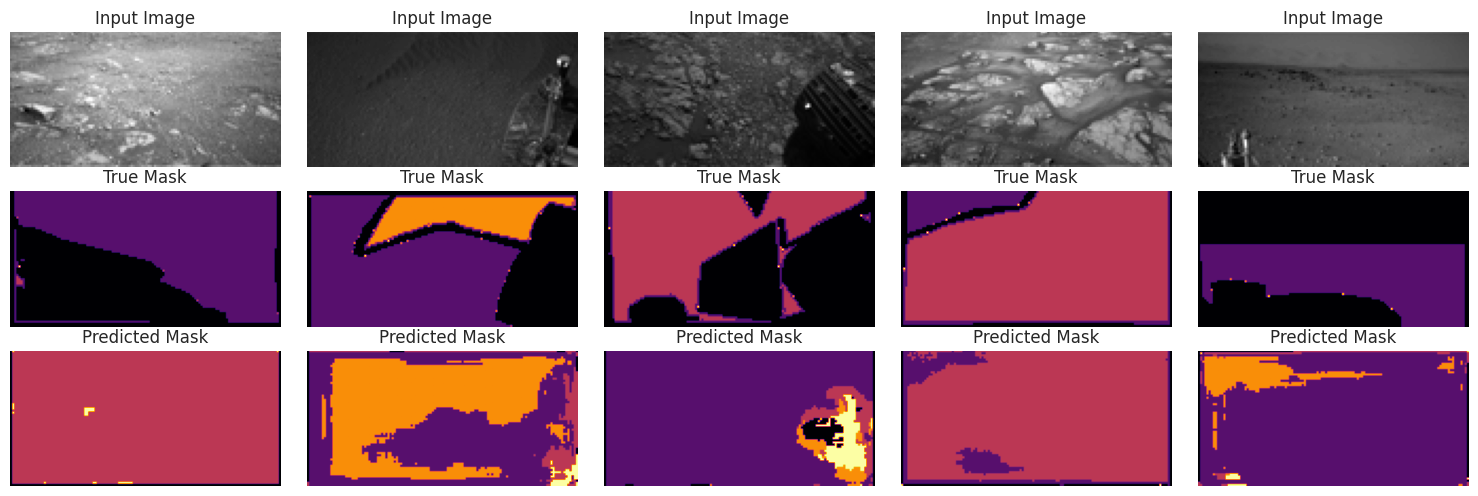


Epoch 26: val_loss did not improve from 0.43113
Epoch 26 : Learning rate = 9.999999747378752e-05
Loss: 0.20744240283966064, Mean IOU: 0.5675077438354492 , Val Loss: 0.6463837027549744, Val Mean IOU: 0.4089483618736267  

Epoch 27: val_loss did not improve from 0.43113
Epoch 27 : Learning rate = 9.999999747378752e-05
Loss: 0.1994183361530304, Mean IOU: 0.5780777335166931 , Val Loss: 0.4406954348087311, Val Mean IOU: 0.47816047072410583  

Epoch 28: val_loss did not improve from 0.43113
Epoch 28 : Learning rate = 9.999999747378752e-05
Loss: 0.19303610920906067, Mean IOU: 0.5869284868240356 , Val Loss: 0.8914079666137695, Val Mean IOU: 0.3974975049495697  

Epoch 29: val_loss did not improve from 0.43113
Epoch 29 : Learning rate = 9.999999747378752e-05
Loss: 0.18855932354927063, Mean IOU: 0.593193531036377 , Val Loss: 0.6503742933273315, Val Mean IOU: 0.43281060457229614  

Epoch 30: val_loss improved from 0.43113 to 0.41345, saving model to best_model_weights.h5.keras
Epoch 30 : Learnin

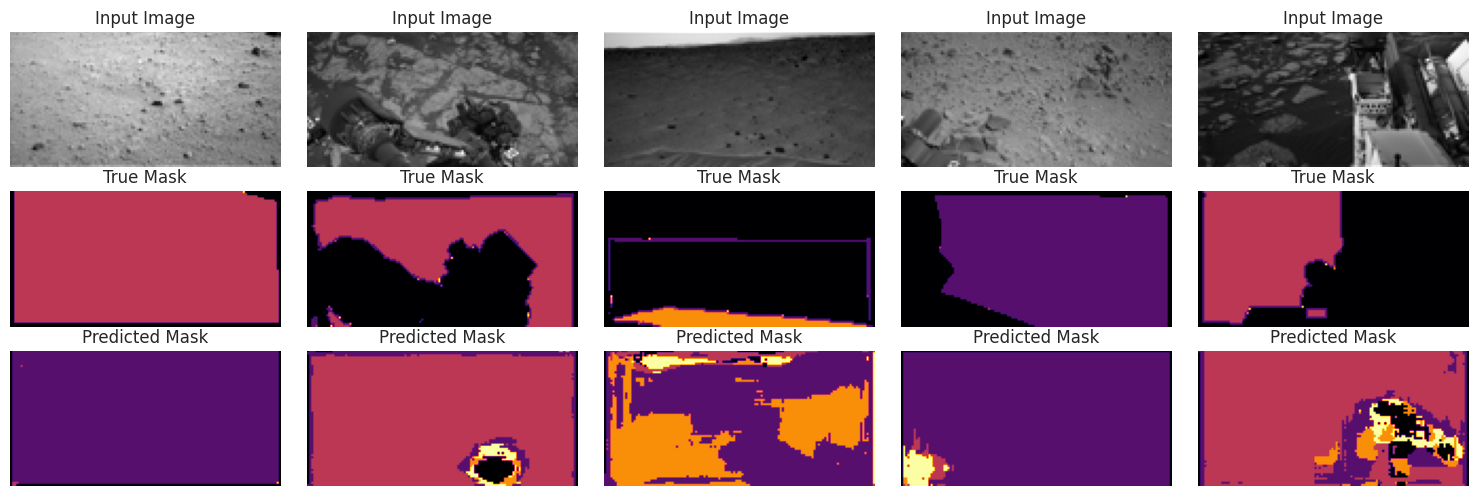


Epoch 31: val_loss did not improve from 0.41345
Epoch 31 : Learning rate = 9.999999747378752e-05
Loss: 0.18938930332660675, Mean IOU: 0.5911056995391846 , Val Loss: 0.7055032849311829, Val Mean IOU: 0.4282318651676178  

Epoch 32: val_loss did not improve from 0.41345
Epoch 32 : Learning rate = 9.999999747378752e-05
Loss: 0.18303370475769043, Mean IOU: 0.6000208854675293 , Val Loss: 0.8079419732093811, Val Mean IOU: 0.41088834404945374  

Epoch 33: val_loss did not improve from 0.41345
Epoch 33 : Learning rate = 9.999999747378752e-05
Loss: 0.18189431726932526, Mean IOU: 0.6013821363449097 , Val Loss: 0.47426897287368774, Val Mean IOU: 0.46901431679725647  

Epoch 34: val_loss did not improve from 0.41345
Epoch 34 : Learning rate = 9.999999747378752e-05
Loss: 0.18279589712619781, Mean IOU: 0.5989850759506226 , Val Loss: 0.8726930618286133, Val Mean IOU: 0.4001632630825043  

Epoch 35: val_loss did not improve from 0.41345
Epoch 35 : Learning rate = 9.999999747378752e-05
Loss: 0.1770787

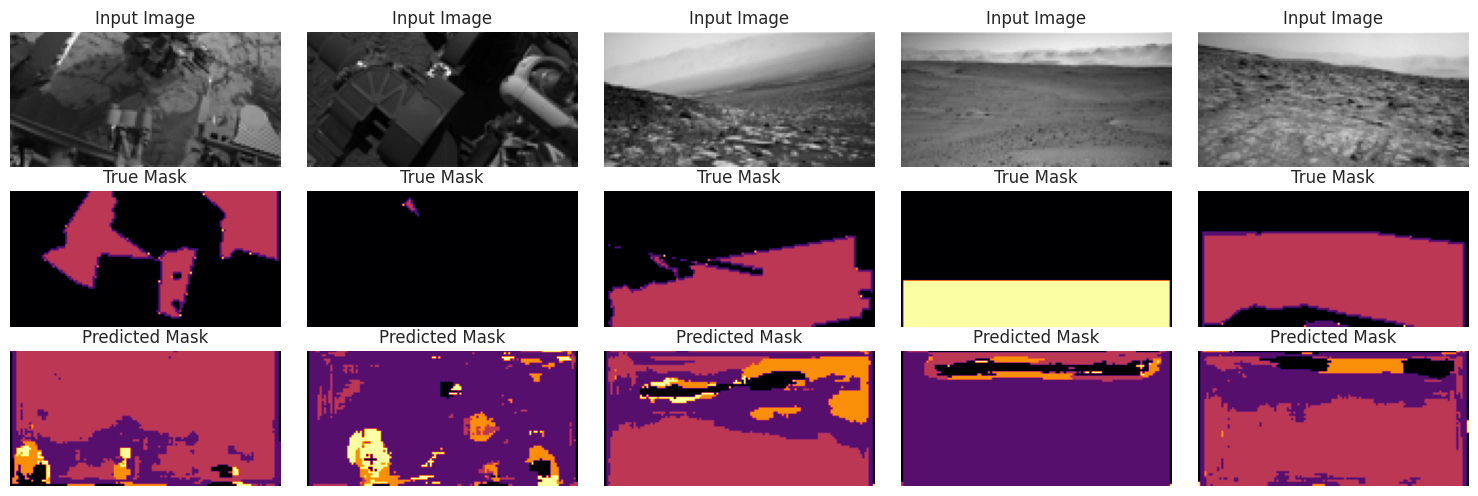


Epoch 36: val_loss did not improve from 0.41345
Epoch 36 : Learning rate = 9.999999747378752e-05
Loss: 0.1707293689250946, Mean IOU: 0.6123185157775879 , Val Loss: 0.8668058514595032, Val Mean IOU: 0.38831812143325806  

Epoch 37: val_loss did not improve from 0.41345
Epoch 37 : Learning rate = 9.999999747378752e-05
Loss: 0.16963256895542145, Mean IOU: 0.6150906682014465 , Val Loss: 0.5447967052459717, Val Mean IOU: 0.4525562822818756  

Epoch 38: val_loss did not improve from 0.41345
Epoch 38 : Learning rate = 9.999999747378752e-05
Loss: 0.17251384258270264, Mean IOU: 0.6092382073402405 , Val Loss: 0.43972477316856384, Val Mean IOU: 0.47739535570144653  

Epoch 39: val_loss did not improve from 0.41345
Epoch 39 : Learning rate = 9.999999747378752e-05
Loss: 0.1692376285791397, Mean IOU: 0.6132138967514038 , Val Loss: 0.5317408442497253, Val Mean IOU: 0.4632294774055481  

Epoch 40: val_loss did not improve from 0.41345
Epoch 40 : Learning rate = 9.999999747378752e-05
Loss: 0.172440409

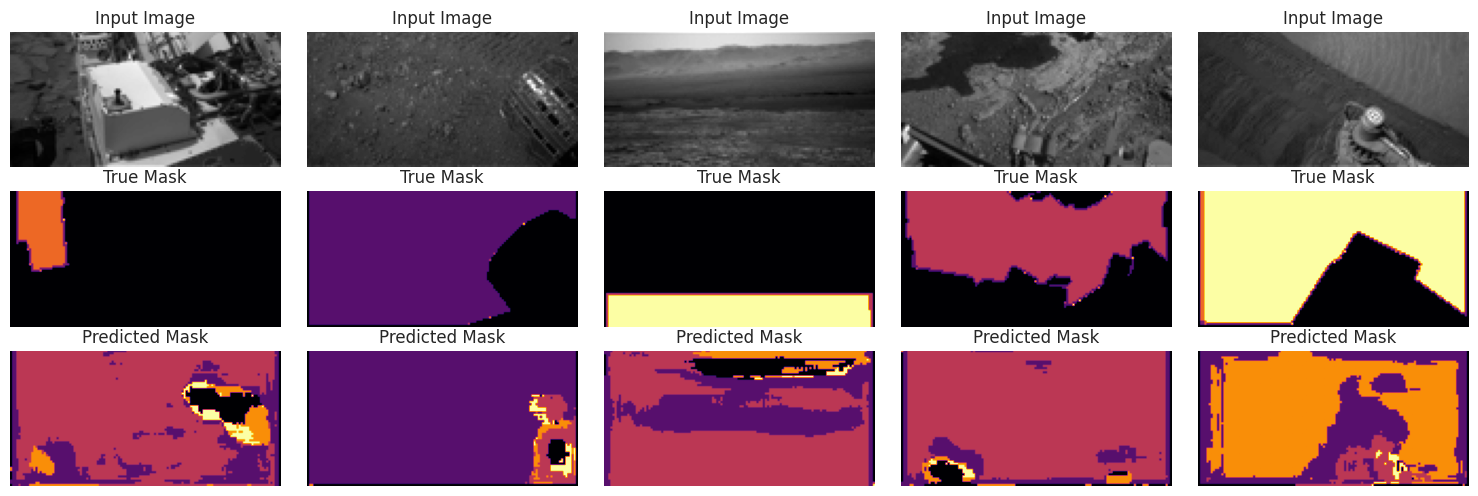


Epoch 41: val_loss did not improve from 0.41345
Epoch 41 : Learning rate = 9.999999747378752e-05
Loss: 0.16199102997779846, Mean IOU: 0.6211504936218262 , Val Loss: 0.4320446252822876, Val Mean IOU: 0.4920455515384674  

Epoch 42: val_loss did not improve from 0.41345
Epoch 42 : Learning rate = 9.999999747378752e-05
Loss: 0.16191914677619934, Mean IOU: 0.621648907661438 , Val Loss: 0.4685022234916687, Val Mean IOU: 0.46871405839920044  

Epoch 43: val_loss improved from 0.41345 to 0.39451, saving model to best_model_weights.h5.keras
Epoch 43 : Learning rate = 9.999999747378752e-05
Loss: 0.16313350200653076, Mean IOU: 0.619088888168335 , Val Loss: 0.394508421421051, Val Mean IOU: 0.5006215572357178  

Epoch 44: val_loss did not improve from 0.39451
Epoch 44 : Learning rate = 9.999999747378752e-05
Loss: 0.15496470034122467, Mean IOU: 0.6289656162261963 , Val Loss: 0.4563332200050354, Val Mean IOU: 0.486752986907959  

Epoch 45: val_loss did not improve from 0.39451
Epoch 45 : Learning r

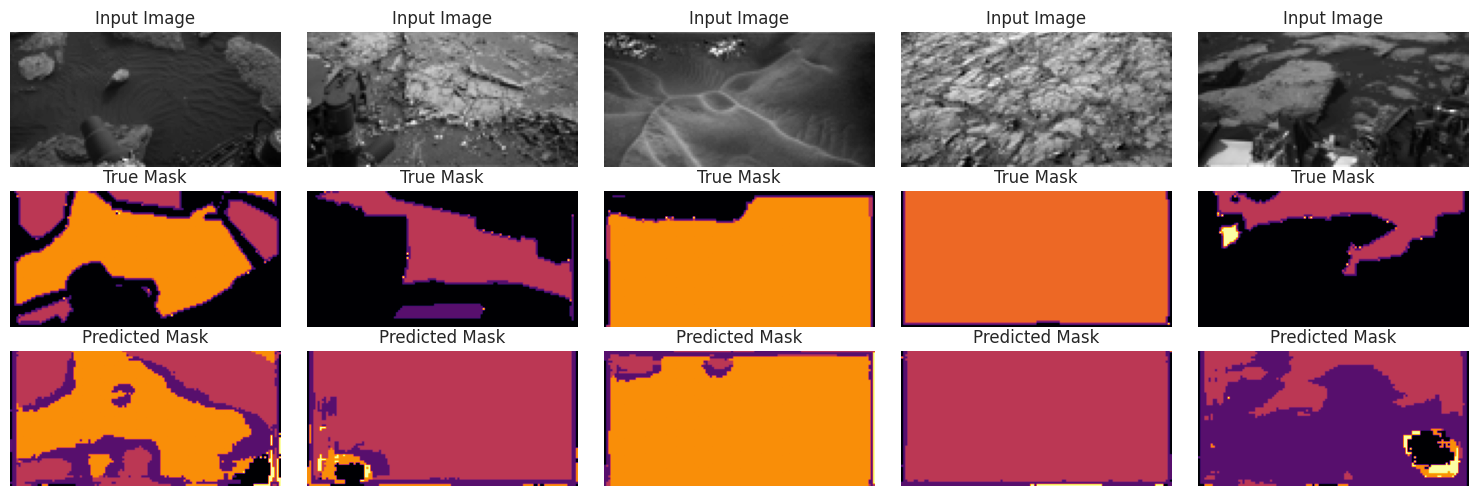


Epoch 46: val_loss did not improve from 0.39451
Epoch 46 : Learning rate = 9.999999747378752e-05
Loss: 0.15825772285461426, Mean IOU: 0.6241110563278198 , Val Loss: 0.5708825588226318, Val Mean IOU: 0.45558732748031616  

Epoch 47: val_loss did not improve from 0.39451
Epoch 47 : Learning rate = 9.999999747378752e-05
Loss: 0.15875157713890076, Mean IOU: 0.6230038404464722 , Val Loss: 0.6269150376319885, Val Mean IOU: 0.4406505227088928  

Epoch 48: val_loss did not improve from 0.39451
Epoch 48 : Learning rate = 9.999999747378752e-05
Loss: 0.15492352843284607, Mean IOU: 0.626682698726654 , Val Loss: 0.5066927671432495, Val Mean IOU: 0.466254323720932  

Epoch 49: val_loss did not improve from 0.39451
Epoch 49 : Learning rate = 9.999999747378752e-05
Loss: 0.17052534222602844, Mean IOU: 0.6073182821273804 , Val Loss: 1.0670418739318848, Val Mean IOU: 0.34719759225845337  

Epoch 50: val_loss did not improve from 0.39451
Epoch 50 : Learning rate = 9.999999747378752e-05
Loss: 0.1571641862

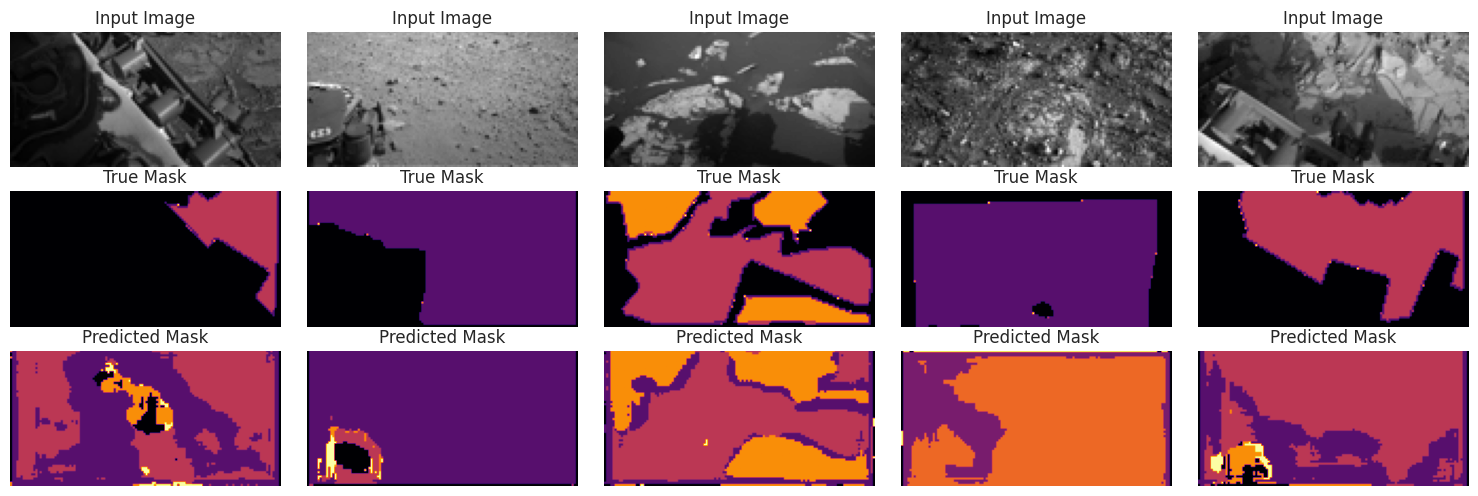


Epoch 51: val_loss did not improve from 0.39451
Epoch 51 : Learning rate = 9.999999747378752e-05
Loss: 0.15468159317970276, Mean IOU: 0.6266193389892578 , Val Loss: 0.5039458870887756, Val Mean IOU: 0.4638133943080902  

Epoch 52: val_loss did not improve from 0.39451
Epoch 52 : Learning rate = 9.999999747378752e-05
Loss: 0.14740152657032013, Mean IOU: 0.6356273889541626 , Val Loss: 0.5092377066612244, Val Mean IOU: 0.45013993978500366  

Epoch 53: val_loss did not improve from 0.39451
Epoch 53 : Learning rate = 9.999999747378752e-05
Loss: 0.1425318866968155, Mean IOU: 0.6410923600196838 , Val Loss: 0.4909977614879608, Val Mean IOU: 0.46184277534484863  

Epoch 54: val_loss did not improve from 0.39451
Epoch 54 : Learning rate = 9.999999747378752e-05
Loss: 0.14771966636180878, Mean IOU: 0.6342838406562805 , Val Loss: 0.5815430283546448, Val Mean IOU: 0.44684281945228577  

Epoch 55: val_loss did not improve from 0.39451
Epoch 55 : Learning rate = 9.999999747378752e-05
Loss: 0.14467176

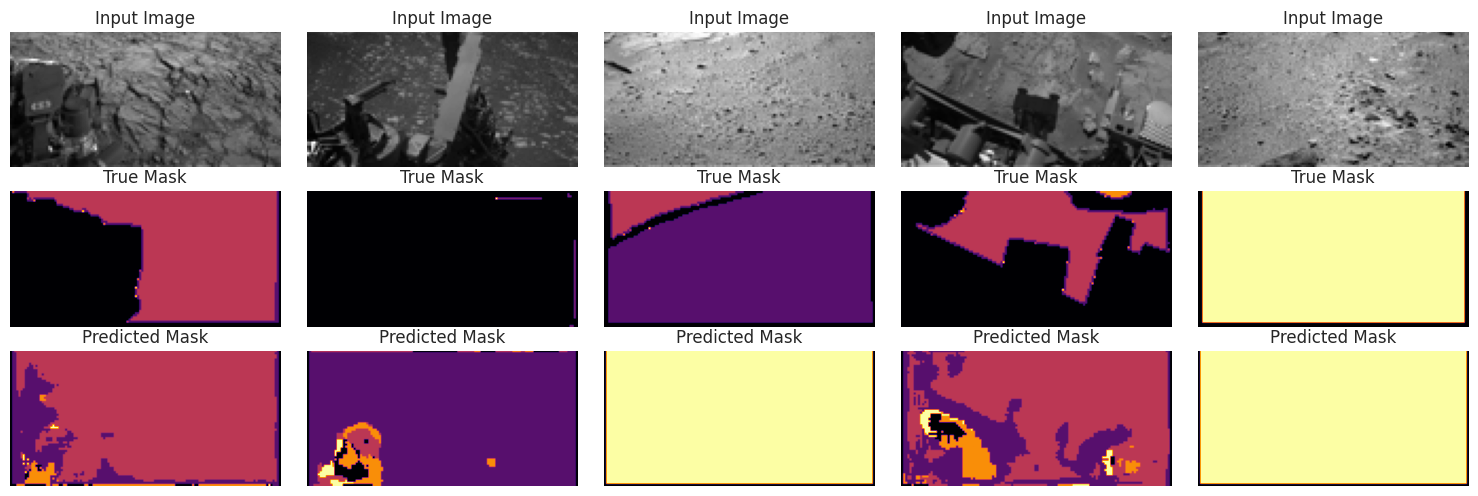


Epoch 56: val_loss did not improve from 0.39451
Epoch 56 : Learning rate = 9.999999747378752e-05
Loss: 0.14767050743103027, Mean IOU: 0.6339198350906372 , Val Loss: 0.5077139139175415, Val Mean IOU: 0.47252407670021057  

Epoch 57: val_loss did not improve from 0.39451
Epoch 57 : Learning rate = 9.999999747378752e-05
Loss: 0.14481540024280548, Mean IOU: 0.6373823285102844 , Val Loss: 0.48066288232803345, Val Mean IOU: 0.47709107398986816  

Epoch 58: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 58: val_loss did not improve from 0.39451
Epoch 58 : Learning rate = 4.999999873689376e-05
Loss: 0.14303971827030182, Mean IOU: 0.6384791731834412 , Val Loss: 0.5624610781669617, Val Mean IOU: 0.45230722427368164  

Epoch 59: val_loss did not improve from 0.39451
Epoch 59 : Learning rate = 4.999999873689376e-05
Loss: 0.13956473767757416, Mean IOU: 0.6418837308883667 , Val Loss: 0.44013911485671997, Val Mean IOU: 0.4810226559638977  

Epoch 60: val_loss did not impro

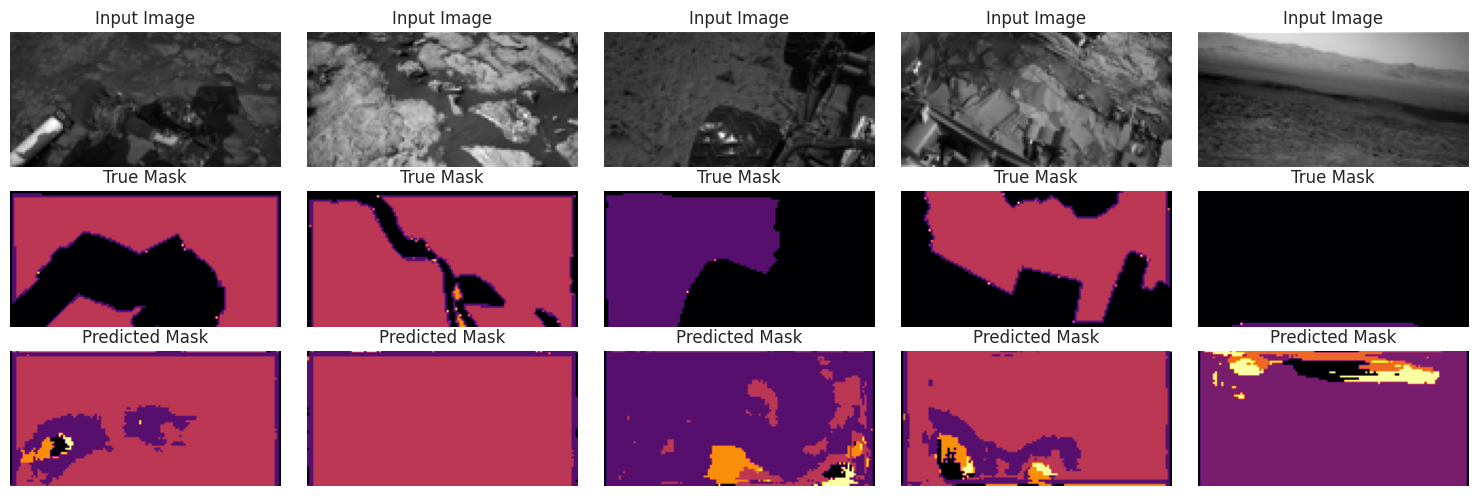


Epoch 61: val_loss did not improve from 0.39451
Epoch 61 : Learning rate = 4.999999873689376e-05
Loss: 0.1308620721101761, Mean IOU: 0.6521308422088623 , Val Loss: 0.4215496778488159, Val Mean IOU: 0.4997493624687195  

Epoch 62: val_loss did not improve from 0.39451
Epoch 62 : Learning rate = 4.999999873689376e-05
Loss: 0.12831653654575348, Mean IOU: 0.6544712781906128 , Val Loss: 0.4158708453178406, Val Mean IOU: 0.4986798167228699  

Epoch 63: val_loss did not improve from 0.39451
Epoch 63 : Learning rate = 4.999999873689376e-05
Loss: 0.12629245221614838, Mean IOU: 0.6563151478767395 , Val Loss: 0.4306686520576477, Val Mean IOU: 0.49648332595825195  

Epoch 64: val_loss did not improve from 0.39451
Epoch 64 : Learning rate = 4.999999873689376e-05
Loss: 0.12445712089538574, Mean IOU: 0.6578205823898315 , Val Loss: 0.4235127568244934, Val Mean IOU: 0.49236375093460083  

Epoch 65: val_loss did not improve from 0.39451
Epoch 65 : Learning rate = 4.999999873689376e-05
Loss: 0.122790530

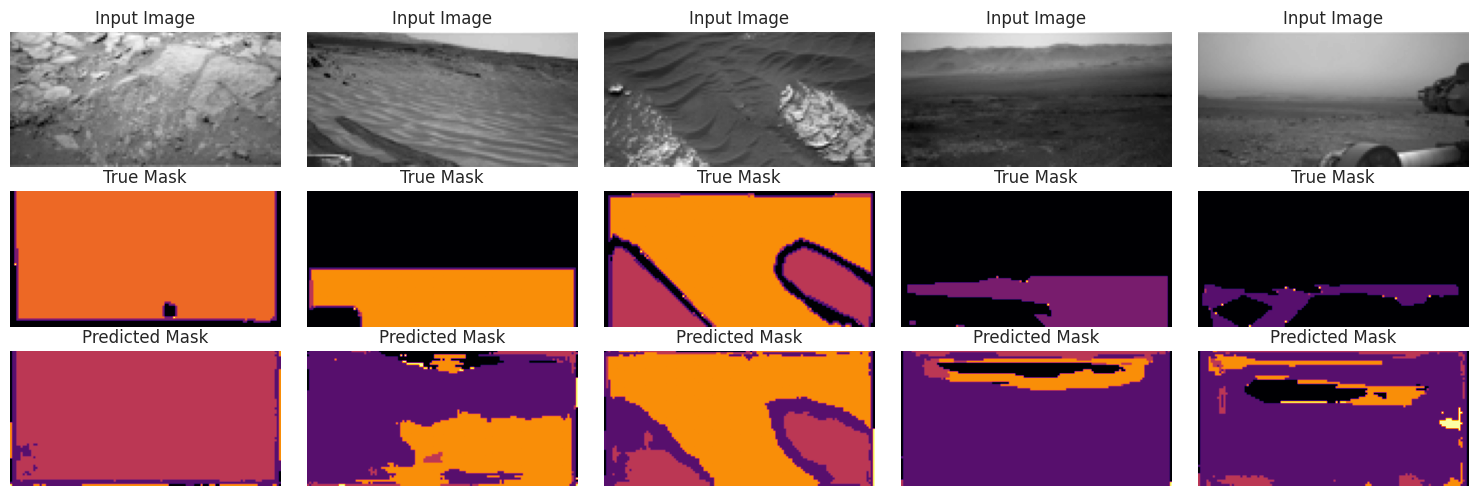


Epoch 66: val_loss did not improve from 0.39451
Epoch 66 : Learning rate = 4.999999873689376e-05
Loss: 0.12131934612989426, Mean IOU: 0.6601681113243103 , Val Loss: 0.4385316073894501, Val Mean IOU: 0.49232396483421326  

Epoch 67: val_loss did not improve from 0.39451
Epoch 67 : Learning rate = 4.999999873689376e-05
Loss: 0.12005046010017395, Mean IOU: 0.6609127521514893 , Val Loss: 0.4534223973751068, Val Mean IOU: 0.4891799986362457  

Epoch 68: val_loss did not improve from 0.39451
Epoch 68 : Learning rate = 4.999999873689376e-05
Loss: 0.1190248653292656, Mean IOU: 0.6612764000892639 , Val Loss: 0.44780030846595764, Val Mean IOU: 0.48248109221458435  

Epoch 69: val_loss did not improve from 0.39451
Epoch 69 : Learning rate = 4.999999873689376e-05
Loss: 0.11806207150220871, Mean IOU: 0.6619018316268921 , Val Loss: 0.45828211307525635, Val Mean IOU: 0.4897422194480896  

Epoch 70: val_loss did not improve from 0.39451
Epoch 70 : Learning rate = 4.999999873689376e-05
Loss: 0.1176551

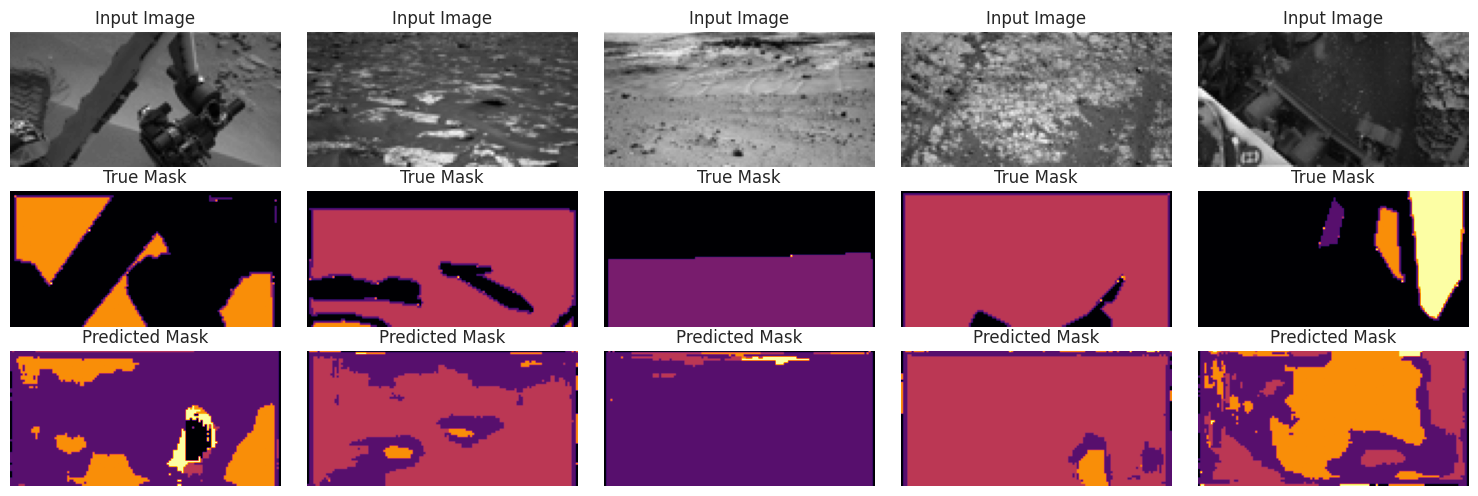


Epoch 71: val_loss did not improve from 0.39451
Epoch 71 : Learning rate = 4.999999873689376e-05
Loss: 0.11765822023153305, Mean IOU: 0.6610506772994995 , Val Loss: 0.768679678440094, Val Mean IOU: 0.3926755487918854  

Epoch 72: val_loss did not improve from 0.39451
Epoch 72 : Learning rate = 4.999999873689376e-05
Loss: 0.11861439794301987, Mean IOU: 0.659129798412323 , Val Loss: 0.8267645835876465, Val Mean IOU: 0.3893250524997711  

Epoch 73: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 73: val_loss did not improve from 0.39451
Epoch 73 : Learning rate = 2.499999936844688e-05
Loss: 0.11886874586343765, Mean IOU: 0.6591438055038452 , Val Loss: 0.5062914490699768, Val Mean IOU: 0.47857171297073364  

Epoch 74: val_loss did not improve from 0.39451
Epoch 74 : Learning rate = 2.499999936844688e-05
Loss: 0.11756455153226852, Mean IOU: 0.6605963706970215 , Val Loss: 0.5447062849998474, Val Mean IOU: 0.4497303366661072  

Epoch 75: val_loss did not improve fro

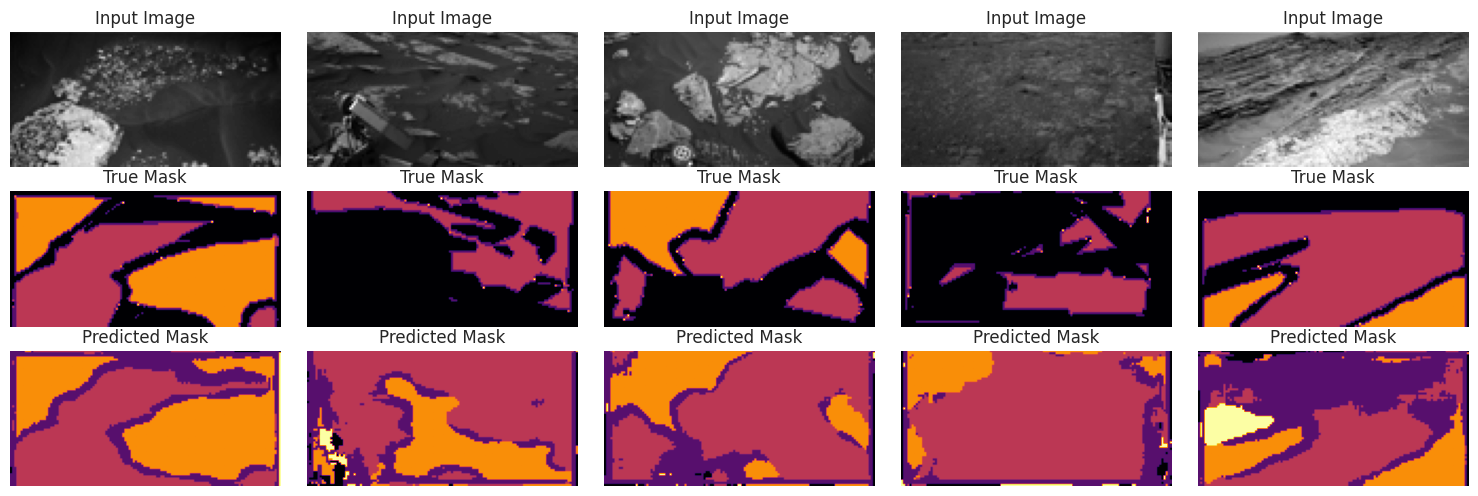


Epoch 76: val_loss did not improve from 0.39451
Epoch 76 : Learning rate = 2.499999936844688e-05
Loss: 0.11397472769021988, Mean IOU: 0.6646732091903687 , Val Loss: 0.6127915382385254, Val Mean IOU: 0.4384320378303528  

Epoch 77: val_loss did not improve from 0.39451
Epoch 77 : Learning rate = 2.499999936844688e-05
Loss: 0.11347021162509918, Mean IOU: 0.6650534272193909 , Val Loss: 1.0085052251815796, Val Mean IOU: 0.3570987582206726  

Epoch 78: val_loss did not improve from 0.39451
Epoch 78 : Learning rate = 2.499999936844688e-05
Loss: 0.11331092566251755, Mean IOU: 0.665115475654602 , Val Loss: 1.3462250232696533, Val Mean IOU: 0.3014717698097229  

Epoch 79: val_loss did not improve from 0.39451
Epoch 79 : Learning rate = 2.499999936844688e-05
Loss: 0.11347164213657379, Mean IOU: 0.664685070514679 , Val Loss: 1.2855350971221924, Val Mean IOU: 0.30896323919296265  

Epoch 80: val_loss did not improve from 0.39451
Epoch 80 : Learning rate = 2.499999936844688e-05
Loss: 0.11413246393

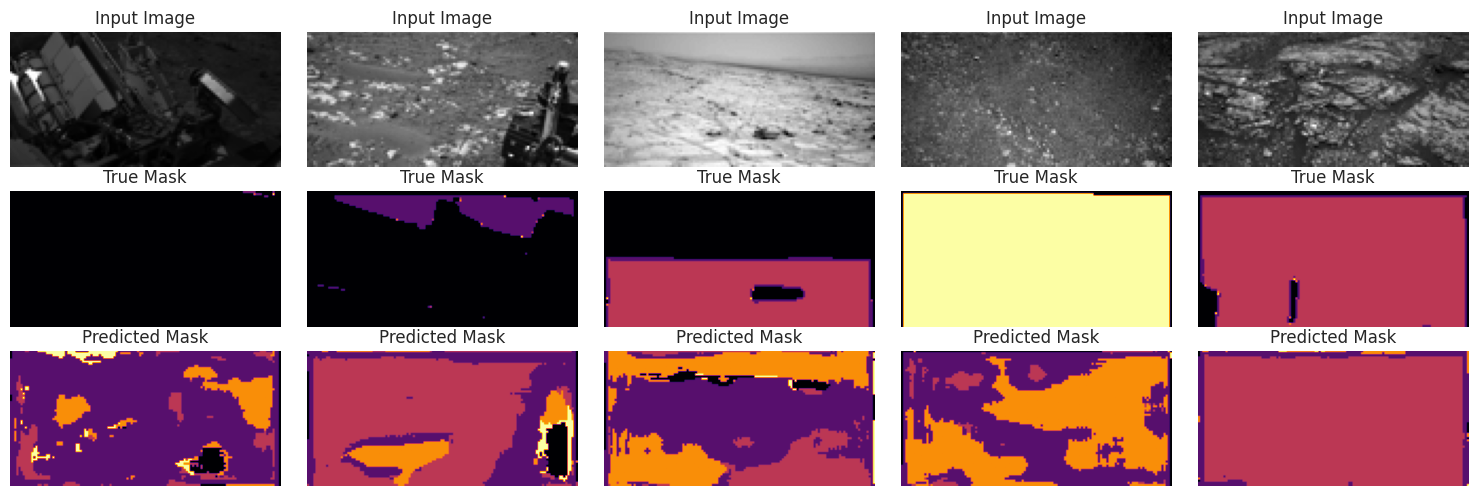


Epoch 81: val_loss did not improve from 0.39451
Epoch 81 : Learning rate = 2.499999936844688e-05
Loss: 0.11309526115655899, Mean IOU: 0.6645880937576294 , Val Loss: 0.8390043377876282, Val Mean IOU: 0.39845818281173706  

Epoch 82: val_loss did not improve from 0.39451
Epoch 82 : Learning rate = 2.499999936844688e-05
Loss: 0.11175695806741714, Mean IOU: 0.6659179925918579 , Val Loss: 0.8079520463943481, Val Mean IOU: 0.40996456146240234  

Epoch 83: val_loss did not improve from 0.39451
Epoch 83 : Learning rate = 2.499999936844688e-05
Loss: 0.11074409633874893, Mean IOU: 0.666840136051178 , Val Loss: 0.7177833318710327, Val Mean IOU: 0.43295302987098694  

Epoch 84: val_loss did not improve from 0.39451
Epoch 84 : Learning rate = 2.499999936844688e-05
Loss: 0.1100146546959877, Mean IOU: 0.6674313545227051 , Val Loss: 0.6486703753471375, Val Mean IOU: 0.4486241340637207  

Epoch 85: val_loss did not improve from 0.39451
Epoch 85 : Learning rate = 2.499999936844688e-05
Loss: 0.109280750

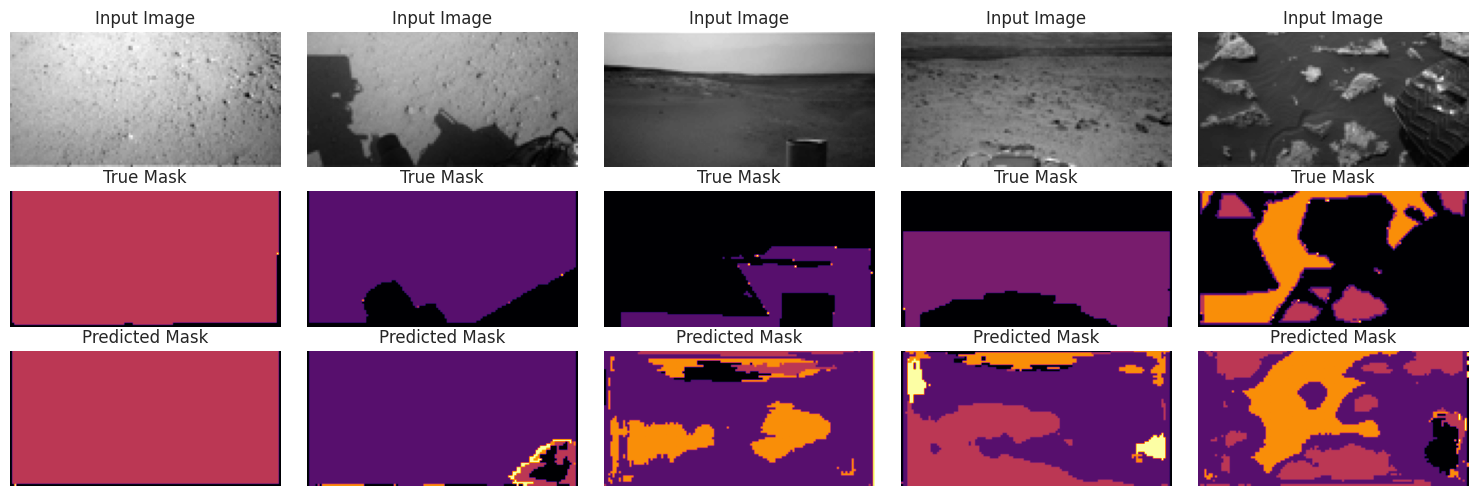


Epoch 86: val_loss did not improve from 0.39451
Epoch 86 : Learning rate = 2.499999936844688e-05
Loss: 0.10867558419704437, Mean IOU: 0.6685659289360046 , Val Loss: 0.6073406934738159, Val Mean IOU: 0.4523685574531555  

Epoch 87: val_loss did not improve from 0.39451
Epoch 87 : Learning rate = 2.499999936844688e-05
Loss: 0.10835456848144531, Mean IOU: 0.6687618494033813 , Val Loss: 0.6260424852371216, Val Mean IOU: 0.4432869851589203  

Epoch 88: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 88: val_loss did not improve from 0.39451
Epoch 88 : Learning rate = 1.249999968422344e-05
Loss: 0.10827825218439102, Mean IOU: 0.6686090230941772 , Val Loss: 0.6802247762680054, Val Mean IOU: 0.42946988344192505  

Epoch 89: val_loss did not improve from 0.39451
Epoch 89 : Learning rate = 1.249999968422344e-05
Loss: 0.11143863201141357, Mean IOU: 0.664792001247406 , Val Loss: 0.7676422595977783, Val Mean IOU: 0.4067493975162506  

Epoch 90: val_loss did not improve fr

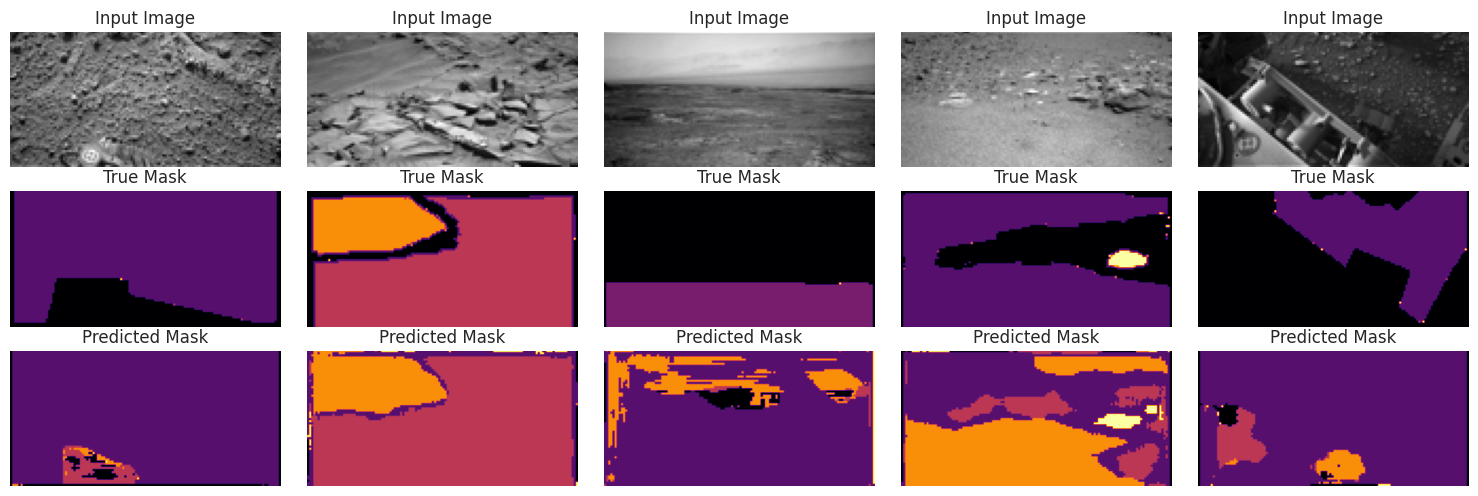


Epoch 91: val_loss did not improve from 0.39451
Epoch 91 : Learning rate = 1.249999968422344e-05
Loss: 0.10743493586778641, Mean IOU: 0.6688648462295532 , Val Loss: 0.8171422481536865, Val Mean IOU: 0.3973800539970398  

Epoch 92: val_loss did not improve from 0.39451
Epoch 92 : Learning rate = 1.249999968422344e-05
Loss: 0.10639891028404236, Mean IOU: 0.6698560118675232 , Val Loss: 0.8237120509147644, Val Mean IOU: 0.3965397775173187  

Epoch 93: val_loss did not improve from 0.39451
Epoch 93 : Learning rate = 1.249999968422344e-05
Loss: 0.10558781027793884, Mean IOU: 0.6706564426422119 , Val Loss: 0.8072078824043274, Val Mean IOU: 0.4002751410007477  

Epoch 94: val_loss did not improve from 0.39451
Epoch 94 : Learning rate = 1.249999968422344e-05
Loss: 0.1048555001616478, Mean IOU: 0.6712955236434937 , Val Loss: 0.7884876728057861, Val Mean IOU: 0.4060531556606293  

Epoch 95: val_loss did not improve from 0.39451
Epoch 95 : Learning rate = 1.249999968422344e-05
Loss: 0.10420067608

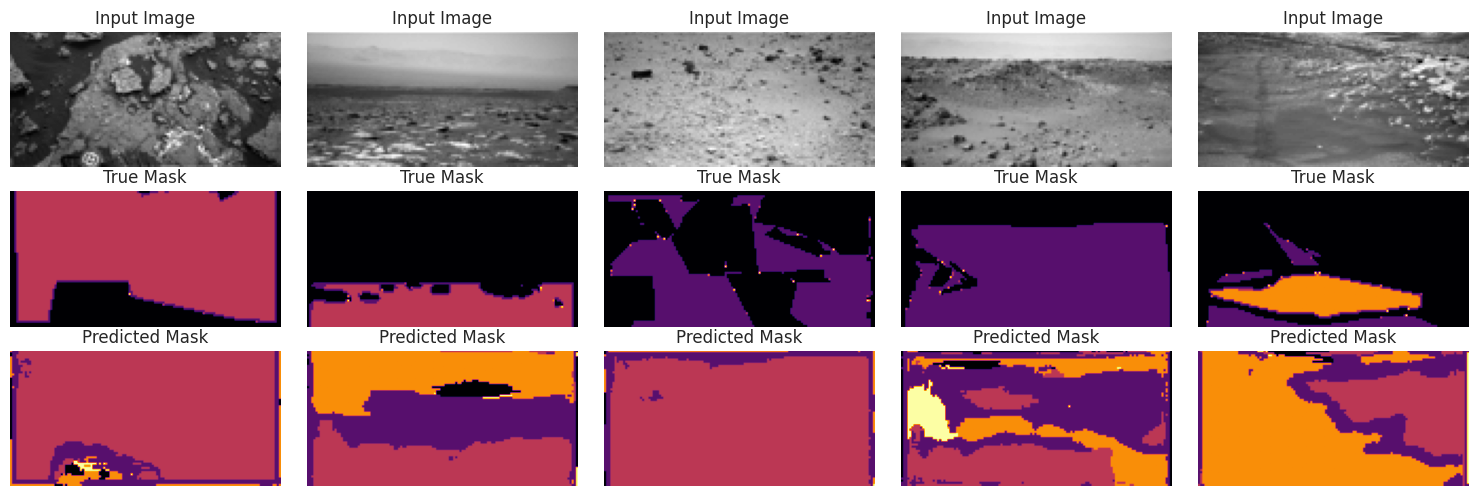


Epoch 96: val_loss did not improve from 0.39451
Epoch 96 : Learning rate = 1.249999968422344e-05
Loss: 0.10359590500593185, Mean IOU: 0.6724815964698792 , Val Loss: 0.7855094075202942, Val Mean IOU: 0.407184898853302  

Epoch 97: val_loss did not improve from 0.39451
Epoch 97 : Learning rate = 1.249999968422344e-05
Loss: 0.10300666093826294, Mean IOU: 0.6729501485824585 , Val Loss: 0.7842056155204773, Val Mean IOU: 0.40854740142822266  

Epoch 98: val_loss did not improve from 0.39451
Epoch 98 : Learning rate = 1.249999968422344e-05
Loss: 0.10243377834558487, Mean IOU: 0.6734724640846252 , Val Loss: 0.7870466709136963, Val Mean IOU: 0.40896934270858765  

Epoch 99: val_loss did not improve from 0.39451
Epoch 99 : Learning rate = 1.249999968422344e-05
Loss: 0.1018797978758812, Mean IOU: 0.6738871335983276 , Val Loss: 0.78589928150177, Val Mean IOU: 0.40893301367759705  

Epoch 100: val_loss did not improve from 0.39451
Epoch 100 : Learning rate = 1.249999968422344e-05
Loss: 0.101352937

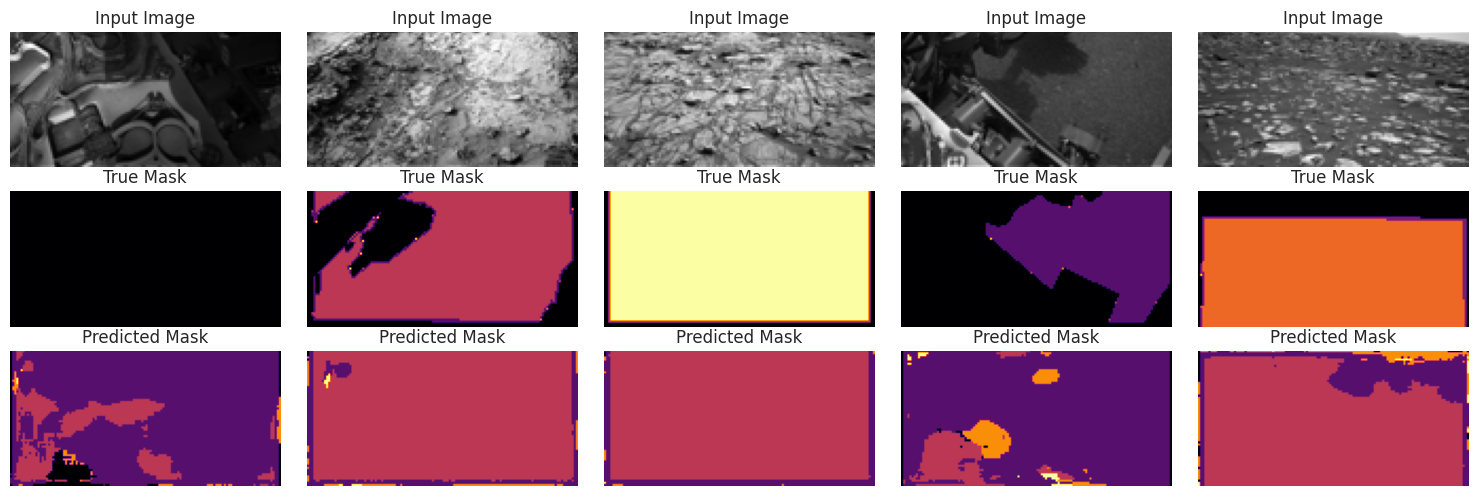


Epoch 101: val_loss did not improve from 0.39451
Epoch 101 : Learning rate = 1.249999968422344e-05
Loss: 0.10083674639463425, Mean IOU: 0.6747556328773499 , Val Loss: 0.7933942079544067, Val Mean IOU: 0.4085003435611725  

Epoch 102: val_loss did not improve from 0.39451
Epoch 102 : Learning rate = 1.249999968422344e-05
Loss: 0.10032511502504349, Mean IOU: 0.6752088069915771 , Val Loss: 0.8168036341667175, Val Mean IOU: 0.40420714020729065  

Epoch 103: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.

Epoch 103: val_loss did not improve from 0.39451
Epoch 103 : Learning rate = 6.24999984211172e-06
Loss: 0.09981580823659897, Mean IOU: 0.6756232976913452 , Val Loss: 0.7952901124954224, Val Mean IOU: 0.409310519695282  

Epoch 104: val_loss did not improve from 0.39451
Epoch 104 : Learning rate = 6.24999984211172e-06
Loss: 0.10161831974983215, Mean IOU: 0.6732490658760071 , Val Loss: 0.753139853477478, Val Mean IOU: 0.4149210453033447  

Epoch 105: val_loss did not impr

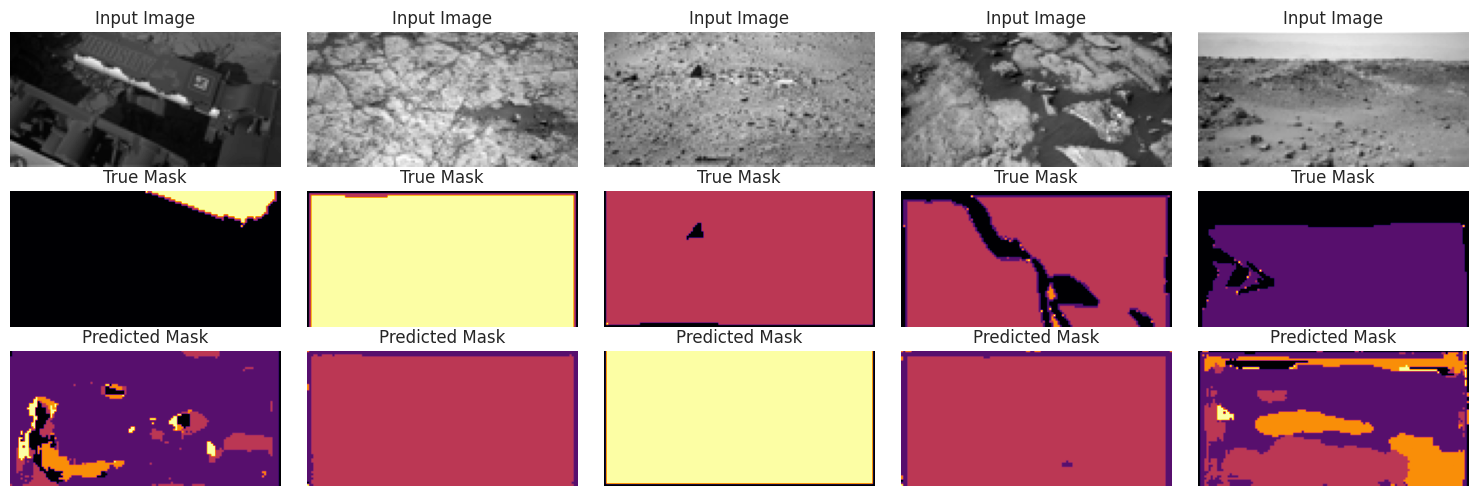

In [ ]:
optimizer = Adam(learning_rate=0.0001)
sparse_cce_loss = SparseCategoricalCrossentropy(ignore_class=0)
import tensorflow as tf



def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0, num_classes=5):
    """
    Compute Focal Loss.
    y_true: Ground truth labels (batch_size, height, width).
    y_pred: Predicted logits (batch_size, height, width, num_classes).
    """
    # Convert integer labels to one-hot encoding
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)

    # Convert logits to probabilities
    y_pred_softmax = tf.nn.softmax(y_pred, axis=-1)

    # Clip predictions to prevent log(0)
    y_pred_clipped = tf.clip_by_value(y_pred_softmax, 1e-7, 1.0 - 1e-7)

    # Compute Focal Loss
    cross_entropy = -y_true_one_hot * tf.math.log(y_pred_clipped)
    focal_loss = alpha * tf.pow(1 - y_pred_clipped, gamma) * cross_entropy

    return tf.reduce_mean(tf.reduce_sum(focal_loss, axis=[1, 2, 3]))

def dice_loss(y_true, y_pred, num_classes=5, smooth=1e-6):
    """
    Compute Dice Loss.
    y_true: Ground truth labels (batch_size, height, width).
    y_pred: Predicted logits (batch_size, height, width, num_classes).
    """
    # Convert integer labels to one-hot encoding
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)

    # Convert logits to probabilities
    y_pred_softmax = tf.nn.softmax(y_pred, axis=-1)

    # Compute intersection and union
    intersection = tf.reduce_sum(y_true_one_hot * y_pred_softmax, axis=[1, 2])
    union = tf.reduce_sum(y_true_one_hot + y_pred_softmax, axis=[1, 2])

    # Compute Dice Loss
    dice_coeff = (2.0 * intersection + smooth) / (union + smooth)
    return 1 - tf.reduce_mean(dice_coeff)

def iou_weights(y_true, y_pred, num_classes=5, smooth=1e-6):
    """
    Compute IoU-based adaptive weights for each class.
    y_true: Ground truth labels (batch_size, height, width).
    y_pred: Predicted logits (batch_size, height, width, num_classes).
    """
    # Convert integer labels to one-hot encoding
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)

    # Convert logits to probabilities
    y_pred_softmax = tf.nn.softmax(y_pred, axis=-1)

    # Compute intersection and union
    intersection = tf.reduce_sum(y_true_one_hot * y_pred_softmax, axis=[1, 2])
    union = tf.reduce_sum(y_true_one_hot + y_pred_softmax, axis=[1, 2]) - intersection

    # Compute IoU and adaptive weights
    iou = intersection / (union + smooth)
    weights = 1 / (iou + smooth)

    return weights / tf.reduce_sum(weights)  # Normalize weights

def combined_loss(y_true, y_pred, alpha_focal=0.25, gamma=2.0, smooth=1e-6, num_classes=5):
    """
    Compute the combined loss using Focal Loss, Dice Loss, and IoU-based weights.
    y_true: Ground truth labels (batch_size, height, width).
    y_pred: Predicted logits (batch_size, height, width, num_classes).
    """
    # Compute Focal Loss
    focal = focal_loss(y_true, y_pred, alpha=alpha_focal, gamma=gamma, num_classes=num_classes)

    # Compute Dice Loss
    dice = dice_loss(y_true, y_pred, num_classes=num_classes, smooth=smooth)
    cce = sparse_cce_loss(y_true, y_pred)
    # Compute IoU-based weights
    weights = iou_weights(y_true, y_pred, num_classes=num_classes, smooth=smooth)

    # Combine losses using weights
    total_loss = tf.reduce_mean(weights * (focal + dice+ cce))
    return total_loss


model.compile(optimizer=optimizer,
              loss=sparse_cce_loss,
              metrics=[mean_iou])


if y_train.shape[-1] == 1:
    y_train = tf.squeeze(y_train, axis=-1)  # Remove the singleton dimension

# Similarly for validation data (if applicable)
if y_val.shape[-1] == 1:
    y_val = tf.squeeze(y_val, axis=-1)


early_stopping = EarlyStopping(monitor='val_loss', patience=80, restore_best_weights=True, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model_weights.h5.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, verbose=1, min_lr=1e-8)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=64,callbacks=[early_stopping, reduce_lr,model_checkpoint,lr_display_callback],shuffle=True,verbose=0)

In [25]:
timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
model.save(model_filename)


print(f"Model saved to {model_filename}")

Model saved to model_241212_092539.keras
